In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv
/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv').drop(columns = 'subject')

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [4]:
df.shape

(7352, 562)

## Apply the Logistic Regression on the entire dataset before Feature Selection.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [6]:
# separate the feature and target.
X = df.drop('Activity', axis = 1)
y = df['Activity']

# label encoding.
le = LabelEncoder()
y = le.fit_transform(y)

# train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


In [8]:
# create the object of the model.
lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = lr.predict(X_test)

In [10]:
print('The test accuracy is : ', accuracy_score(y_test, y_pred))

The test accuracy is :  0.9809653297076818


In [11]:
# always remove the duplicate columns from the dataset. 
X_train = X_train.loc[ : , ~X_train.T.duplicated()]
X_test = X_test.loc[ : , ~X_test.T.duplicated()]

In [12]:
print(X_train.shape)
print(X_test.shape)

(5881, 540)
(1471, 540)


## Now we are applying the Feature selection technique.

### 1. Variance Threshold technique.

In [13]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.05)
selector.fit(X_train)

VarianceThreshold(threshold=0.05)

In [14]:
sum(selector.get_support())

np.int64(349)

In [15]:
columns = X_train.columns[selector.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [16]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [18]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


### 2. Correlation

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

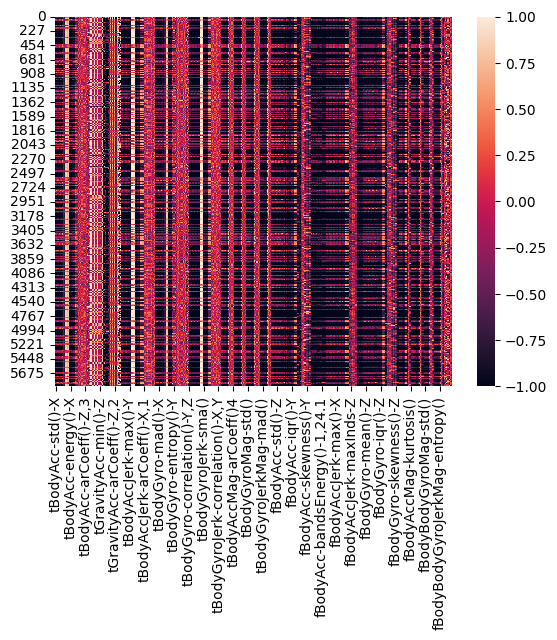

In [20]:
sns.heatmap(X_train)
plt.show()

In [21]:
X_train.corr()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.023914,-0.002241,-0.010535,0.024098,-0.005865,-0.014838,0.029230,-0.000207,-0.023622,-0.008700,...,-0.024274,0.031310,0.021829,-0.006297,0.013870,1.000000,-0.104987,-0.009878,-0.006218,-0.011178
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.000472,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,0.077000,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,-0.093215,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205


In [22]:
# find the column names. 
columns = X_train.columns

In [23]:
# find the columns to drop from the dataframe. 

columns_to_be_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        correlation = X_train[columns[i]].corr(X_train[columns[j]])
        if correlation > 0.95:
            columns_to_be_drop.append(columns[j])


columns_to_be_drop = set(columns_to_be_drop)
print(columns_to_be_drop)

{'tGravityAcc-min()-Z', 'fBodyAccJerk-entropy()-Z', 'tBodyGyroJerk-max()-X', 'fBodyAccJerk-mad()-Z', 'fBodyGyro-iqr()-X', 'fBodyBodyGyroMag-std()', 'tBodyGyroMag-max()', 'fBodyBodyAccJerkMag-mean()', 'fBodyBodyGyroMag-iqr()', 'tBodyAccMag-std()', 'fBodyAccJerk-iqr()-Y', 'fBodyAcc-std()-X', 'fBodyAcc-max()-Y', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerk-sma()', 'fBodyAccJerk-sma()', 'fBodyAccJerk-iqr()-X', 'fBodyAccMag-std()', 'tBodyAccJerkMag-mean()', 'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAccJerk-iqr()-Z', 'fBodyBodyGyroMag-mean()', 'fBodyBodyAccJerkMag-mad()', 'fBodyBodyAccJerkMag-max()', 'fBodyBodyAccJerkMag-std()', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyGyro-iqr()-Z', 'tBodyAccJerk-sma()', 'tBodyGyroJerk-iqr()-X', 'fBodyBodyGyroMag-max()', 'tBodyAccJerk-std()-X', 'tBodyAcc-mad()-Y', 'fBodyAcc-entropy()-X', 'tBodyGyroJerk-arCoeff()-X,1', 'tBodyAccJerk-arCoeff()-Z,1', 'fBodyGyro-mean()-Z', 'fBodyAcc-bandsEnergy()-1,24.2', 'tBodyAcc-iqr()-Z', 'tBodyAccMag-iqr()', 'fBodyAccJerk-bandsEnergy(

In [24]:
# length of the columns that we are remove from the dataframe.
print(len(columns_to_be_drop))

197


In [25]:
# drop the columns from dataframe.
X_train = X_train.drop(columns_to_be_drop, axis = 1)
X_test = X_test.drop(columns_to_be_drop, axis = 1)

In [26]:
print(X_train.shape)
print(X_test.shape)

(5881, 152)
(1471, 152)


### 3. ANOVA is used to remove the columns(features) from the dataframe.

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [28]:
# create the object of the 
selector = SelectKBest(score_func=f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[selector.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [29]:
columns = X_train.columns[selector.get_support()]

In [30]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [32]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


## Now we apply again Logistic Regression after doing Feature Selection.

### Moment of the Truth.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
log_lr = LogisticRegression(max_iter = 1000)

log_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred = log_lr.predict(X_test)

In [36]:
print('The Test Accuracy is : ', accuracy_score(y_test, y_pred))

The Test Accuracy is :  0.9700883752549286


# Conclusion.

### Here we see that they accuracy is around to be similar when we are train model our model with 632 columns and with 100 columns.


Features ----> 562, Accuracy -----> 98%


Features ----> 100, Accuracy -----> 97%

# Feature Selection using Chi-Square testing.

In [37]:
import pandas as pd
import numpy as np


from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [38]:
titanic_df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]

In [39]:
titanic_df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [40]:
ct = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
ct

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [41]:
chi2_contingency(ct)[1]

np.float64(4.549251711298793e-23)

In [42]:
score = []

for column in titanic_df.columns[:-1]:
    ct = pd.crosstab(titanic_df[column], titanic_df['Survived'])
    score.append(chi2_contingency(ct)[1])


score

[np.float64(4.549251711298793e-23),
 np.float64(1.1973570627755645e-58),
 np.float64(1.5585810465902147e-06),
 np.float64(9.703526421039997e-05),
 np.float64(1.769922284120912e-06)]

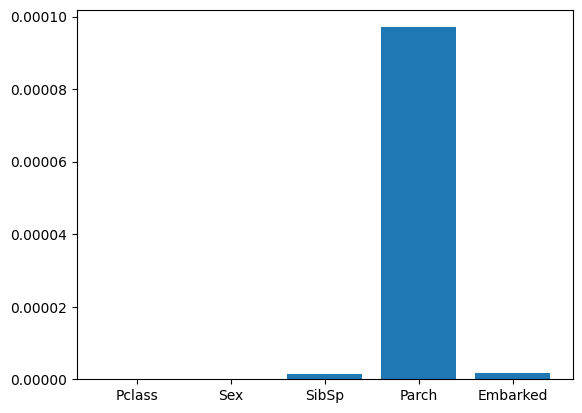

In [43]:
plt.bar(titanic_df.columns[ : -1], score)
plt.show()